In [201]:
#Real estate valuation

In [202]:
data_path = '/home/hd1/work/work_DL/basic projects/real_estate'

In [203]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import scipy.stats as stats

In [204]:
def load_data(data_path = data_path):
    csv_file = os.path.join(data_path,'real_estate_dataset.xlsx')
    return pd.read_excel(csv_file)

estatedf = load_data()
estatedf.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [205]:
estatedf.rename(columns={'X1 transaction date': 'trans_date', 
                   'X2 house age': 'house_age',
                  'X3 distance to the nearest MRT station': 'nearestMRTS',
                  'X4 number of convenience stores': 'num_cstores',
                  'X5 latitude': 'latitude',
                  'X6 longitude': 'longitude',
                  'Y house price of unit area': 'hpriceperuarea'}, inplace=True)

In [206]:
estatedf.head()

,No,trans_date,house_age,nearestMRTS,num_cstores,latitude,longitude,hpriceperuarea
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [207]:
#The No column doesnt look useful it just index -> drop it
#Since Transaction date is within a small period of time -> Drop it
estatedf = estatedf.drop(['No', 'trans_date'] , axis=1)


In [208]:
estatedf.shape

(414, 6)

In [209]:
estatedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   house_age       414 non-null    float64
 1   nearestMRTS     414 non-null    float64
 2   num_cstores     414 non-null    int64  
 3   latitude        414 non-null    float64
 4   longitude       414 non-null    float64
 5   hpriceperuarea  414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


In [210]:
#All data is numeric and non-null
#No Missing values
estatedf.head()

,house_age,nearestMRTS,num_cstores,latitude,longitude,hpriceperuarea
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


In [211]:
#Summary of numerical attributes
estatedf.describe()

,house_age,nearestMRTS,num_cstores,latitude,longitude,hpriceperuarea
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


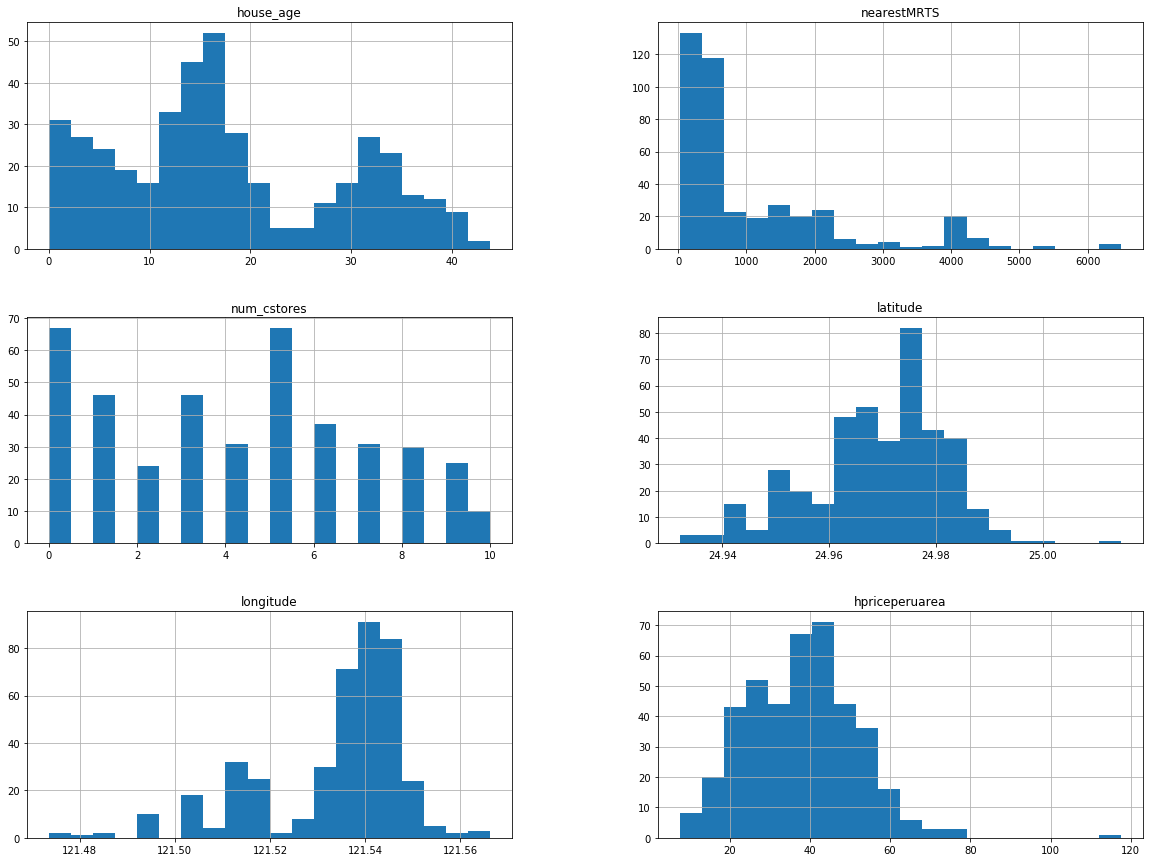

In [212]:
##plot a histogram for each numerical attribute
import matplotlib.pyplot as plt
%matplotlib inline
estatedf.hist(bins=20, figsize=(20,15))
plt.show()

In [213]:
#Lets create a test set which we will not use till we have completed work
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(estatedf, test_size=0.2, random_state=42)

In [214]:
#Discover and Visualize the Data to Gain Insights
#make sure you have put the test set aside and you are only 
#exploring the training set-->create train set copy

estatedfT = train_set.copy()

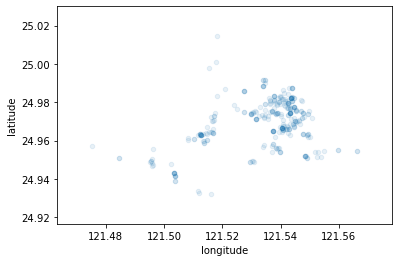

In [215]:
estatedfT.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

In [216]:
corr_matrix = estatedfT.corr()
corr_matrix["hpriceperuarea"].sort_values(ascending=False)

hpriceperuarea    1.000000
num_cstores       0.554251
latitude          0.531052
longitude         0.495413
house_age        -0.214238
nearestMRTS      -0.657009
Name: hpriceperuarea, dtype: float64

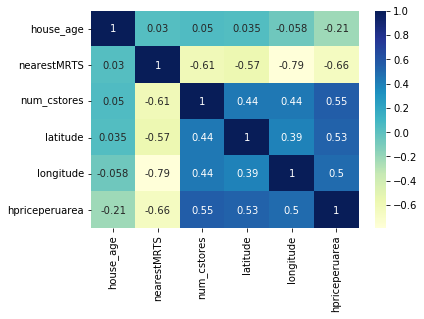

In [217]:
dataplot = sns.heatmap(estatedfT.corr(), cmap="YlGnBu", annot=True)

In [218]:
#We see some collinearity between independent longitude latitude and num_cstores so maybe dropping some feature would help

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb543c9be0>,
      dtype=object)

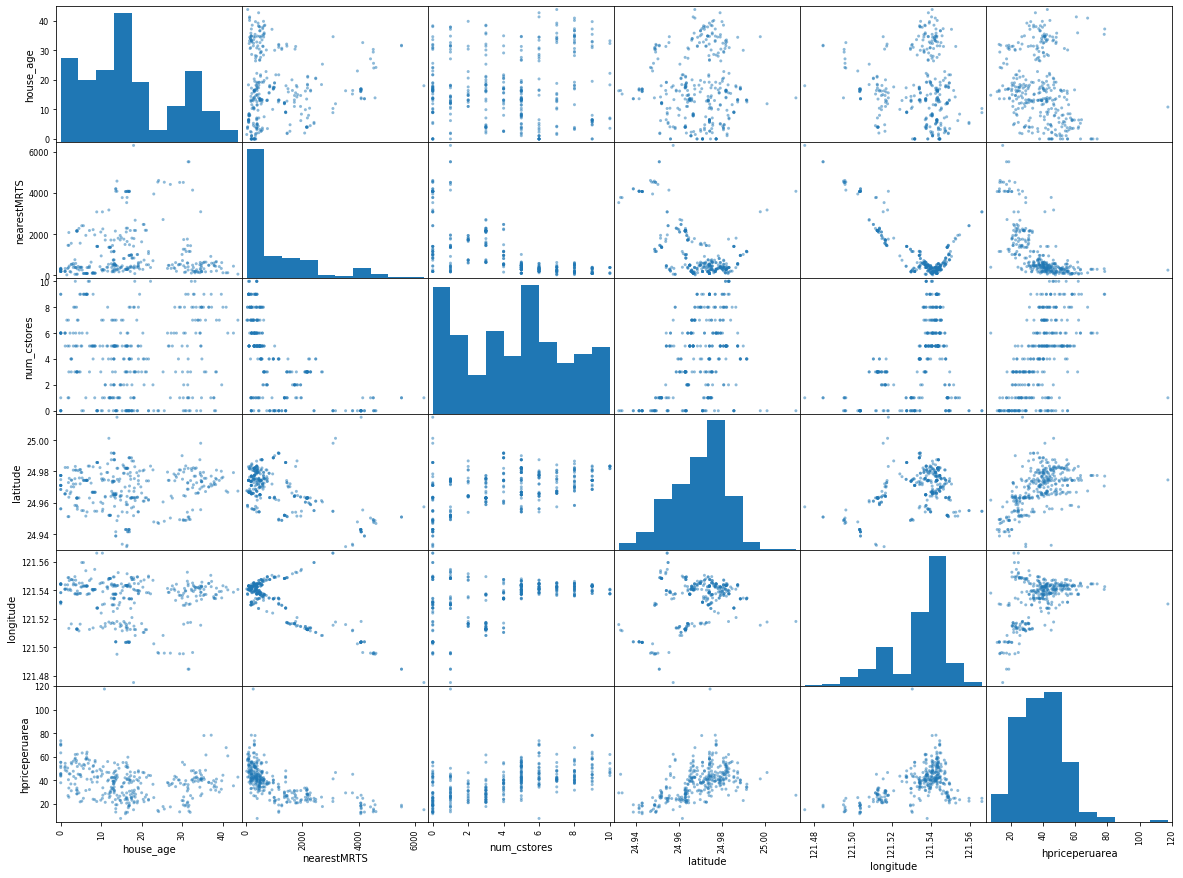

In [219]:
from pandas.plotting import scatter_matrix
scatter_matrix(estatedfT, figsize=(20, 15))

In [220]:
#separate the predictors and the labels
data_train = train_set.drop("hpriceperuarea", axis=1)
data_labels = train_set["hpriceperuarea"].copy()

In [221]:
#Feature Scaling
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('std_scaler', StandardScaler()),
])

data_train1 = num_pipeline.fit_transform(data_train)

In [222]:
#Lets train a model and analyze
#Select and Train a Model

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(data_train1, data_labels)

LinearRegression()

In [223]:
#See some predictions
data_for_pred = data_train.iloc[:5]
labels_for_pred = data_labels.iloc[:5]
data_transformed = num_pipeline.transform(data_for_pred)

In [224]:
print("Predictions:", lin_reg.predict(data_transformed))

Predictions: [38.33909826 33.77517449 33.83202309 39.95337348 44.32296935]


In [225]:
print("Labels:", list(labels_for_pred))

Labels: [42.7, 23.9, 32.1, 38.3, 40.8]


In [226]:
#measure this regression model’s RMSE on the whole training set 
#using Scikit-Learn’s mean_squared_error()

from sklearn.metrics import mean_squared_error
price_predictions = lin_reg.predict(data_train1)
lin_mse = mean_squared_error(data_labels, price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.24299191158531

In [227]:
##This indicates a typical prediction error of 9.24 Ping
#Let's do Cross validation

In [228]:
def model_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [229]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, data_train1, data_labels,
                            scoring="neg_mean_squared_error", cv=10)
linreg_rmse_scores = np.sqrt(-lin_scores)
model_scores(linreg_rmse_scores)

Scores: [ 9.51747877  8.62302384  8.40142231  9.14892224  6.76770422  8.83413575
  8.05131019  9.26997272  7.93320358 15.0676978 ]
Mean: 9.161487143446731
Standard deviation: 2.108747296255122


In [230]:
#Let's do more Feature Scaling and see if we can get better results
#Let's see QQ Plot since from the histograms of variables previously we have seen not normal distrution and skewness

In [231]:
def normaldist_check_plots(df, variable):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist()

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.show()

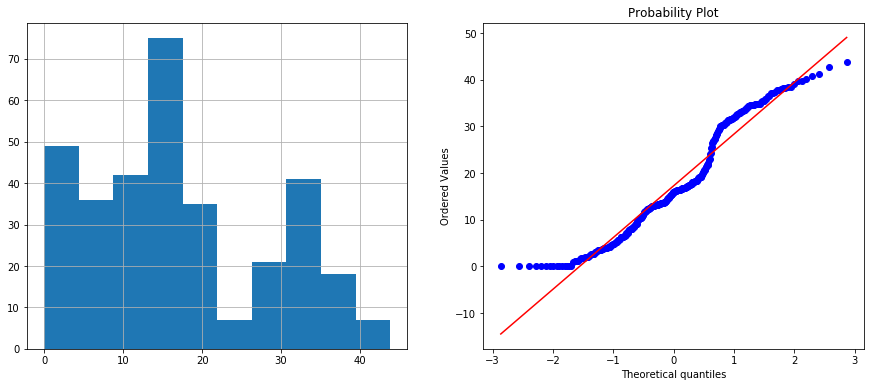

In [232]:
normaldist_check_plots(estatedfT, 'house_age')

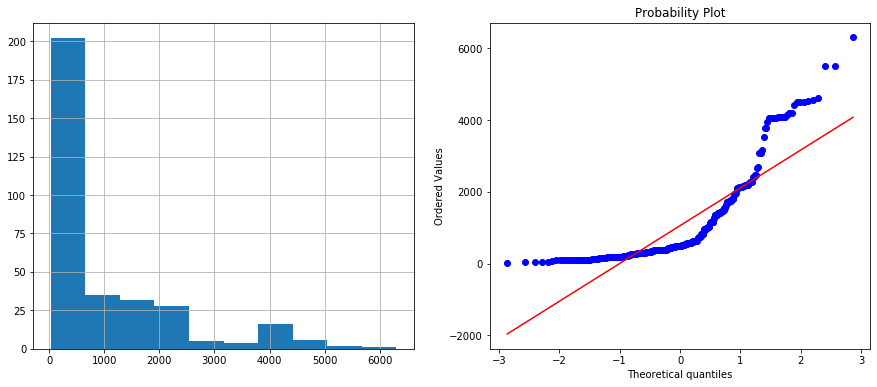

In [233]:
normaldist_check_plots(estatedfT, 'nearestMRTS')

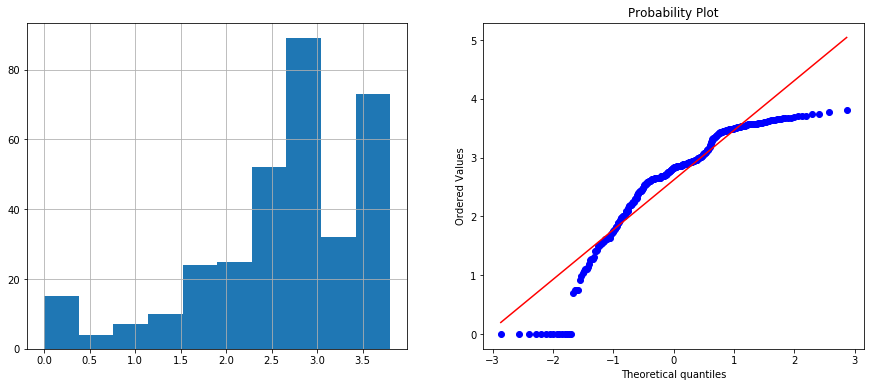

In [234]:
#Lets try Log Transformation 
transformed_data = train_set.copy()
transformed_data['house_age']=np.log(transformed_data['house_age']+1)
normaldist_check_plots(transformed_data,'house_age')


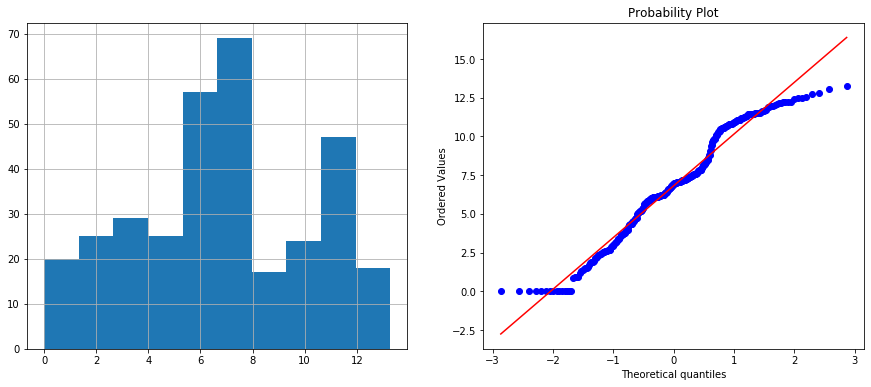

In [235]:
#Let's try Box Cox Transformation
transformed_data = train_set.copy()
transformed_data['house_age'], param = stats.boxcox(transformed_data.house_age+1) # you can vary the exponent as needed
normaldist_check_plots(transformed_data, 'house_age')

In [236]:
#Box Cox gives a much better result

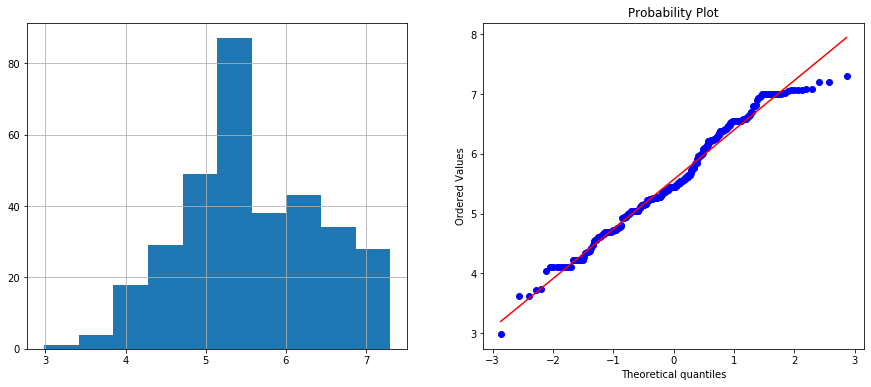

In [237]:
#Let's try Box Cox Transformation on 'nearestMRTS'
transformed_data = train_set.copy()
transformed_data['nearestMRTS'], param = stats.boxcox(transformed_data.nearestMRTS+1) # you can vary the exponent as needed
normaldist_check_plots(transformed_data, 'nearestMRTS')

In [238]:
#This also shows good result

In [239]:
#Let's check longitude feature

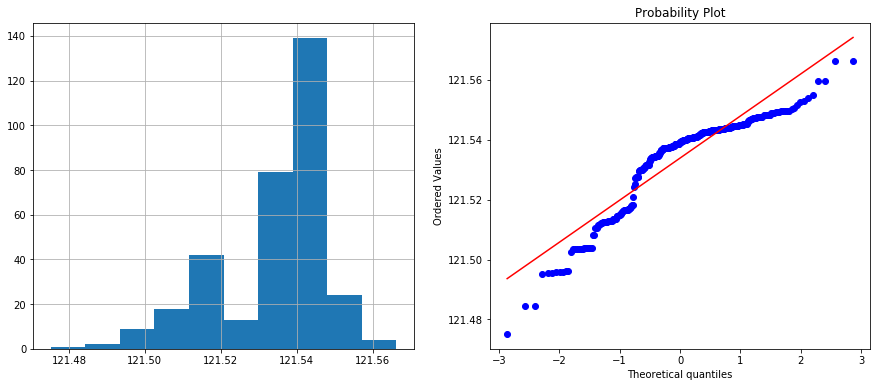

In [240]:
normaldist_check_plots(transformed_data, 'longitude')

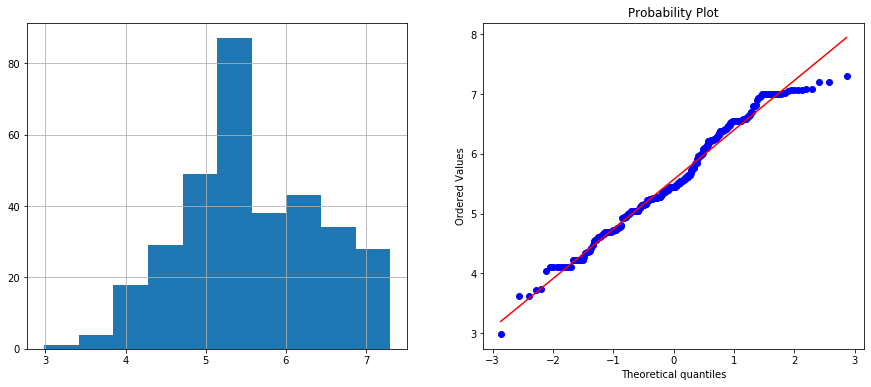

In [241]:
transformed_data = train_set.copy()
transformed_data['longitude'], param = stats.boxcox(transformed_data.nearestMRTS+1) # you can vary the exponent as needed
normaldist_check_plots(transformed_data, 'longitude')

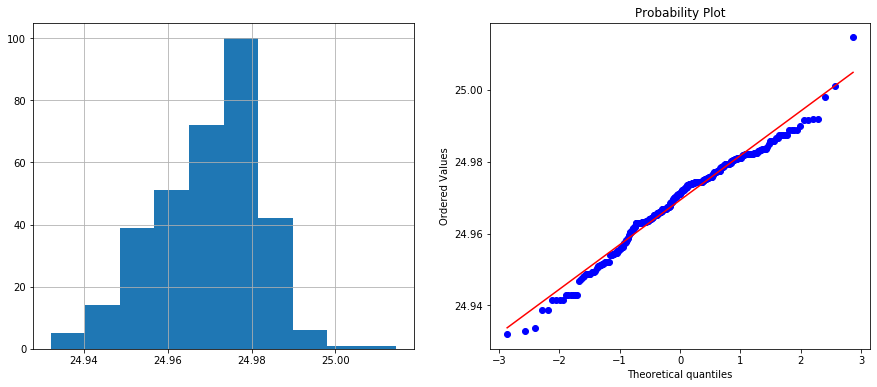

In [242]:
normaldist_check_plots(transformed_data, 'latitude')

In [243]:
#This is a nicely distributed we won't transform it

In [244]:
#Apply the Box Cox on selected features and do Linear Regression

In [245]:
ft_estatedf = train_set.copy()

In [246]:
ft_estatedf['house_age'], param = stats.boxcox(ft_estatedf.house_age+1)

ft_estatedf['nearestMRTS'], param = stats.boxcox(ft_estatedf.nearestMRTS+1) 

ft_estatedf['longitude'], param = stats.boxcox(ft_estatedf.nearestMRTS+1) 


In [247]:
ft_estatedf1 = num_pipeline.fit_transform(ft_estatedf)

In [248]:
lin_reg2 = LinearRegression()
lin_reg2.fit(ft_estatedf1, data_labels)

LinearRegression()

In [249]:
price_predictions2 = lin_reg2.predict(ft_estatedf1)
lin_mse = mean_squared_error(data_labels, price_predictions2)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

6.971522468285836e-14

In [250]:
lin_scores2 = cross_val_score(lin_reg2, ft_estatedf1, data_labels,
                            scoring="neg_mean_squared_error", cv=10)
linreg_rmse_scores2 = np.sqrt(-lin_scores2)
model_scores(linreg_rmse_scores2)

Scores: [1.11725394e-14 1.49965687e-14 7.16572910e-15 8.86022644e-15
 9.91447678e-15 1.62246878e-14 1.50760592e-14 1.67581169e-14
 6.24601933e-15 1.08581236e-14]
Mean: 1.1727254722425684e-14
Standard deviation: 3.6174570353621644e-15


In [195]:
#Let's try Other Models --> since we have seen some multicollinearity

In [131]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(data_train1, data_labels)

DecisionTreeRegressor()

In [132]:
price_predictions = tree_reg.predict(data_train1)
lin_mse = mean_squared_error(data_labels, price_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

1.3097146510866005

In [134]:
#We get an even better score with Decision Tree but it can be a result of overfit
#Let's do cross validation 

In [136]:
tree_scores = cross_val_score(tree_reg, data_train1, data_labels,
                            scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [138]:
model_scores(linreg_rmse_scores)

Scores: [ 9.51747877  8.62302384  8.40142231  9.14892224  6.76770422  8.83413575
  8.05131019  9.26997272  7.93320358 15.0676978 ]
Mean: 9.161487143446731
Standard deviation: 2.108747296255122


In [ ]:
#The results of cross val on Linear regression shows consistent results

In [139]:
model_scores(tree_rmse_scores)

Scores: [ 9.8649558   8.01404544 11.95293802 14.24539325  8.48685369 10.54656342
  8.31519693 13.97526495  7.71271702 13.80596325]
Mean: 10.691989176447416
Standard deviation: 2.4891313510733197


In [140]:
#The results show that Decision Trees Classifier has overfitted the data
#and it has actually performed worse than Linear Regression

In [141]:
#Trying out Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(data_train1, data_labels)

rf_predictions = forest_reg.predict(data_train1)
forest_mse = mean_squared_error(data_labels, rf_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

3.2112601023255904

In [143]:
forest_scores = cross_val_score(forest_reg, data_train1, data_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

model_scores(forest_rmse_scores)

Scores: [ 7.8786295   6.47921795  8.41439169  9.37096222  6.28548859  8.76028837
  6.91965662  5.53962146  6.21611067 13.81787515]
Mean: 7.968224223091967
Standard deviation: 2.283348294384486


In [ ]:
#Random Forest is also overfitting the data but it is still much less than Decision Tree

In [ ]:
#Right Now it seems Linear Regression with Feature Scaling is the best suited model 

In [144]:
#Trying to predict from test data now

In [145]:
data_test = test_set.drop("hpriceperuarea", axis=1)
data_test_labels = test_set["hpriceperuarea"].copy()

In [146]:
data_test1 = num_pipeline.fit_transform(data_test)

In [200]:
linearreg2_scores = cross_val_score(lin_reg2, data_test1, data_test_labels,
scoring="neg_mean_squared_error", cv=10)
linearreg2_rmse_scores = np.sqrt(-linearreg2_scores)

model_scores(linearreg2_rmse_scores)

Scores: [ 6.89260708 10.82794398  7.13116625  6.3122844  11.84408154  8.2878998
  6.4044247   4.78491241  4.84460684  8.47270998]
Mean: 7.580263697637086
Standard deviation: 2.2133123428356036


In [148]:
forest_scores = cross_val_score(forest_reg, data_test1, data_test_labels,
scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

model_scores(forest_rmse_scores)

Scores: [ 4.26514881 11.91710605  5.42051342  8.62594126 10.40743321  7.18445222
  5.95380686  5.89567877  5.4086986   9.57172078]
Mean: 7.465049998378378
Standard deviation: 2.402868034168511


In [251]:
#We see both models show similar performance